**YOUR NAME**

Fall 2024

CS 251: Data Analysis and Visualization

# Lab 4b | Principal Component Analysis

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-dark'])
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'figure.figsize': [6,6]})

np.set_printoptions(suppress=True, precision=5)

## Task 1: Visualize PCA for a 2D dog data set

The goal of this lab is for you to gain experience visualizing the covariance matrix and principal components. We begin with a data set that has the mid-range value for height (in inches) and weight (in pounds) for each of 146 dog breeds. The data set was constructed from part of a data set made available on Kaggle (https://www.kaggle.com/datasets/jasleensondhi/dog-intelligence-comparison-based-on-size).

### Task 1a: Scatter plot the original and normalized data

1. Use pandas to read data/AKC_Breed_Inof_mid.csv in a data fram
2. Examine the contents of the data frame
3. Make a data frame that has just the weight (first) and height (second) columns. You can do that by indexing into the data frame with the list `['weight_mid_lbs','height_mid_inches']`. Store it in a variable named `x_df`
4. Scatter plot the height vs weight (i.e. height on y-axis, weight on x-axis)
5. Normalize ths columns by subtracting the min and then dividing the difference by the max minus min (storing the result in `x_df`). Note that since you are operating with a data frame, you do not need to supply axis information - it will automatically apply the operation along each column.
6. In a new figure, scatter plot the normalized height vs weight.

   Unnamed: 0  weight_mid_lbs  height_mid_inches                 Breed
0           0           100.0               27.0                 Akita
1           1           125.0               28.0    Anatolian Sheepdog
2           2            97.5               25.0  Bernese Mountain Dog
3           3           100.0               25.0            Bloodhound
4           4            85.0               27.0                Borzoi


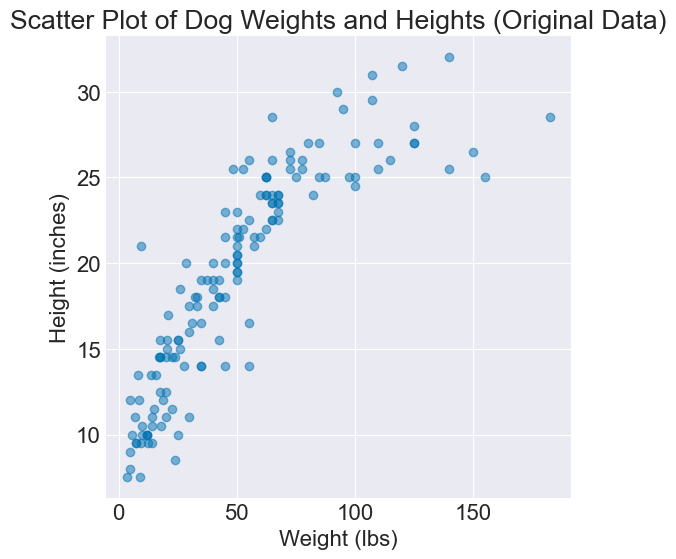

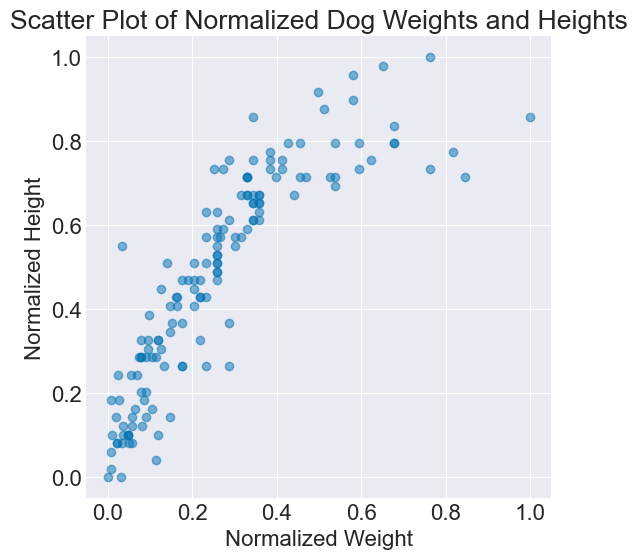

In [49]:
# Your code here
file_path = 'data/AKC_Breed_Info_mid.csv'  
df = pd.read_csv(file_path)

print(df.head())  

x_df = df[['weight_mid_lbs', 'height_mid_inches']]

plt.figure(figsize=(6, 6))
plt.scatter(x_df['weight_mid_lbs'], x_df['height_mid_inches'], alpha=0.5)
plt.title("Scatter Plot of Dog Weights and Heights (Original Data)")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")
plt.grid(True)
plt.show()

x_df_normalized = (x_df - x_df.min()) / (x_df.max() - x_df.min())

plt.figure(figsize=(6, 6))
plt.scatter(x_df_normalized['weight_mid_lbs'], x_df_normalized['height_mid_inches'], alpha=0.5)
plt.title("Scatter Plot of Normalized Dog Weights and Heights")
plt.xlabel("Normalized Weight")
plt.ylabel("Normalized Height")
plt.grid(True)
plt.show()


### 1b. Create and visualize a covariance matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the covariance matrix of the `x_df` columns, store it in a variable, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. Set the xticks, yticks, xticklabels and ytickslabels. When setting the xtick labels, rotate them so they are readable and horizontally align them to the right (i.e. `ha='right'`). You can also use `setp` to handle rotating the x-axis tick labels.
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the `cmap` parameter for `imshow`
    4. Include a `colorbar`. This can be achieved by assigning a variable to your `imshow` call and then passing in that variable as a parameter to `plt.colorbar`. If that does not work, the [this example code](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) may be helpful.

*Your heatmap should show a 2x2 grid of colored squares.*

Covariance matrix shape: (2, 2)


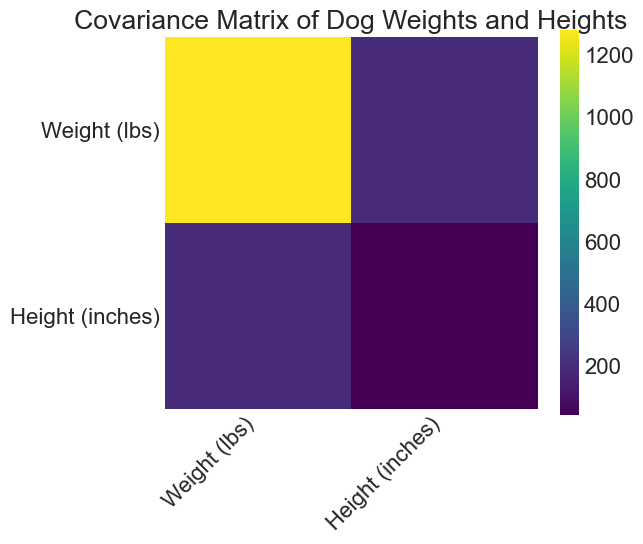

In [50]:
# Your code here
file_path = 'data/AKC_Breed_Info_mid.csv'  
df = pd.read_csv(file_path)

x_df = df[['weight_mid_lbs', 'height_mid_inches']]

cov_matrix = x_df.cov()

print("Covariance matrix shape:", cov_matrix.shape)

plt.figure(figsize=(6, 5))
heatmap = plt.imshow(cov_matrix, cmap='viridis')  

plt.title('Covariance Matrix of Dog Weights and Heights')
plt.xticks([0, 1], ['Weight (lbs)', 'Height (inches)'], rotation=45, ha='right')  
plt.yticks([0, 1], ['Weight (lbs)', 'Height (inches)'])  

plt.colorbar(heatmap)

plt.show()


### 1c. Questions

**Question 1:** What interpretations can you draw from this covariance matrix?



**Answer 1:**

The covariance matrix heatmap reveals insights into the relationship between dog weight and height, indicating a positive covariance between the two variables. This suggests that as a dog's weight increases, its height also tends to increase, meaning heavier dogs are generally taller. However, covariance alone does not convey the strength or exact nature of this relationship. The diagonal elements of the matrix, representing the variances of weight and height, show that the variance of weight is greater than that of height, as indicated by the bright yellow square in the top left corner. This indicates that there is more variability in the weights of different dog breeds compared to their heights, suggesting that while dogs differ significantly in weight, their heights are more consistent across breeds.

### 1d. Performing PCA

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to apply PCA to the dog dataset.
1. Create an instance of the PCA class with 2 components. *This means that we will compute all the principal components (eigenvectors of the covariance matrix) for our 2-D data set*.
2. Call the method `fit_` with `x_df` as the X parameter.
3. Store the transpose of the `components_` field of the PCA object in an variable named e_vecs. Then print it. The output should be

`[[ 0.6031   0.79766]
 [ 0.79766 -0.6031 ]]`

Each column of `e_vecs` is a principal component.

4. Store the `explained_variance_` field of the PCA object in a variable named `e_vals`. The first entry in `e_vals` is the eigen-value associated with the first column of `e_vecs`. Print the values. They should be `[0.09758 0.00696]`

In [33]:
from sklearn.decomposition import PCA

In [34]:
# Your code here
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(x_df)

e_vecs = pca.components_.T  
print("Eigenvectors (Principal Components):\n", e_vecs)

e_vals = pca.explained_variance_
print("Eigenvalues:\n", e_vals)


Eigenvectors (Principal Components):
 [[ 0.98884 -0.14897]
 [ 0.14897  0.98884]]
Eigenvalues:
 [1307.87122    9.98408]


### 1e. Visualize the vectors on the scatter plot

When we perform PCA in just two dimensions, it is helpful to plot the eigenvectors as vectors on the scatter plot, so we can clearly identify the primary and secondary directions of variation in the data. The vectors should start at the center of the data and their lengths should be proportional to their associated eigenvalues (so we can capture the relative importance of the directions). You should think of the entries in the eigenvectors as slopes. For the sake of simplicity (and time), I have worked out the scale you should use for this example (it is 8).

1. Compute the center of the data and store it as a numpy array (rather than as a data frame): `center = x_df.mean().to_numpy()`
2. Scatter plot the columns of x_df as above (copy-paste your code)
3. Using the `plot` function, plot the first vector. Provide x-coordinates for the beginning of the line (`center[0]`) and the end, which is computed by adding 8 times the first `e_val` times the x-coordinate of the first eigenvector (i.e. `e_vec[0,0]`). Provide the y-coordinates for the begining (`center[1]`) and end, which is computed by adding 8 times the first `e_val` times the y-coordinate of the first eigenvector (i.e. `e_vec[1,0]`)
4. Plot the second vector in a similar fashion. Just use the second egeinvalue and second eigenvector instead of the first.

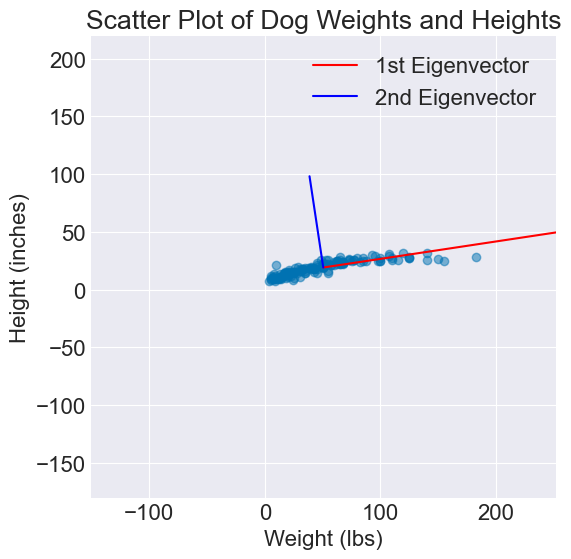

In [51]:
# Your code here
center = x_df.mean().to_numpy()

plt.scatter(x_df['weight_mid_lbs'], x_df['height_mid_inches'], alpha=0.5)
plt.title("Scatter Plot of Dog Weights and Heights")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")

plt.plot(
    [center[0], center[0] + 8 * e_vals[0] * e_vecs[0, 0]],
    [center[1], center[1] + 8 * e_vals[0] * e_vecs[1, 0]],
    color='red',
    label='1st Eigenvector'
)

plt.plot(
    [center[0], center[0] + 8 * e_vals[1] * e_vecs[0, 1]],
    [center[1], center[1] + 8 * e_vals[1] * e_vecs[1, 1]],
    color='blue',
    label='2nd Eigenvector'
)

plt.legend()
plt.axis('equal')  

plt.xlim(center[0] - 200, center[0] + 200)
plt.ylim(center[1] - 200, center[1] + 200)

plt.grid()
plt.show()


### 1f. Visualize the PCA loadings as a heat map

When we have more than 2 dimensions, we need to use alternate forms of visualization, so let's look at an alternate method now, so we can compare it to the vector version about. We introduce a new term -- **loadings**. In PCA, the **loadings** refer to the numbers that make up the principal component vectors (i.e. the eigenvectors). The shape of the loadings (eigenvectors) are `(k, M)` where `k` is the number of PCs and `M` is the number of original variables in the dataset. This task focuses on visualizing and interpreting what the loadings mean.

Use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to make a heatmap of the loadings (which are in `e_vecs`).
   
1. Include a title.
2. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`. The y tick labels (rows) should show the original 2 variable names. The 2 x tick labels should be labeled with `'PC1'` and `'PC2'`.
3. Use an perceptually uniform **diverging** [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). Set it using the `cmap` parameter for `imshow`.
4. To ensure that 0 is indicated by the neutral/middle color in the colormap, we need the data to be color-mapped using a range that is centered on zero. Compute the magnitude of the loadings (the maximim absolute loading). If you store that magnitude in a variable, named `mag`, then you can add the parameter and value to the imshow call: `norm=matplotlib.colors.Normalize(-mag,mag)`.
5. Include a `colorbar`. This can be achieved by assigning a variable to your `imshow` call and then passing in that variable as a parameter to `plt.colorbar`. If that does not work, the [this example code](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) may be helpful.

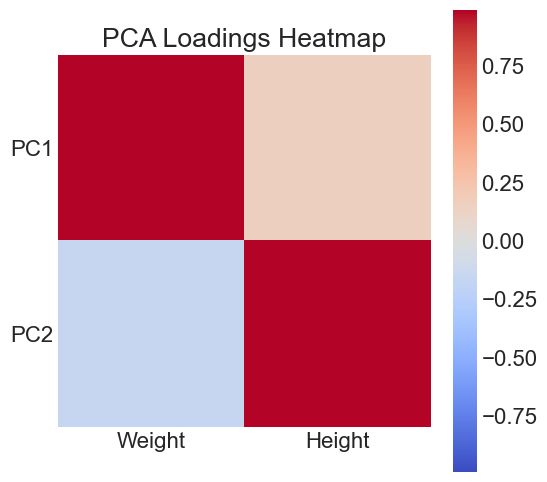

In [52]:
# Your code here
import matplotlib.colors as mcolors
fig, ax = plt.subplots()

mag = np.max(np.abs(e_vecs))  

cax = ax.imshow(e_vecs.T, cmap='coolwarm', norm=mcolors.Normalize(-mag, mag))

ax.set_title("PCA Loadings Heatmap")

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Weight', 'Height'])  
ax.set_yticklabels(['PC1', 'PC2'])  

plt.colorbar(cax)

plt.show()


### 1g. Questions

**Question 2:** Interpret the loadings of PC1 and PC2 by relating them to the vector plot above. Also, does height or weight play a larger role in the first vector? 

**Answer 2:**

The PCA loadings heatmap illustrates the contributions of height and weight to the two main components. For PC1, weight has a strong positive loading indicated by red, suggesting it captures more variation in the data, while height shows a lighter beige color, reflecting a smaller contribution. Conversely, in PC2, height is represented in red with a strong positive contribution, while weight appears in light blue, indicating a weaker or negative contribution. This means weight is dominant in the primary direction of variation (PC1), whereas height is more significant in the secondary direction (PC2). This aligns with the vector plot, where the first eigenvector is closely aligned with the weight axis, and the second eigenvector captures variation along the height axis.

## Task 2: PCA on a cancer data set

### 2a. Load and preprocess

To get a tate of PCA for a larger data set, we will use the [Wisconsin Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)) this week. To keep the lab assignment manageable, we provide some of the code (you can think of the instructions as explanations of the code, in this case).

1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from the url:  https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv
2. Create a `cancer_x` DataFrame which includes all of the columns that have the word "mean" in the title (*there should be 10 in total*).
3. Print out a summary of the `cancer_x` DataFrame.
4. Update `cancer_x` so that each variable is min-max normalized. Print out a summary of the updated DataFrame.
5. `diagnosis` is a categorical variable (`M` stands for "malignant" and `B` stands for "benign"). Create a `cancer_y` Series with from the column `diagnosis` and convert the data type to [categorical](https://pandas.pydata.org/docs/user_guide/categorical.html).
    1. In Task 2 of this lab you will use `diagnosis` to color-code a scatter plot of the cancer data. Use [rename_categories](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#renaming-categories) to replace the categorical levels with color string names. To do this, pass in a dictionary as the parameter that maps the strings `'M'` and `'B'` to [colors](https://matplotlib.org/stable/gallery/color/named_colors.html) of your choice (e.g. `'red'`, `'blue'`). By default, the `rename_categories` method doesn't update the DataFrame when you call it, so don't forget to update the value of `cancer_y` by assigning it to the output of your `rename_categories` method call.
    2. Print out `cancer_y`. You should see the `dtype` as `category` and the values should be one of two named color strings (e.g. `'red'`, `'blue'`).

In [67]:
url="https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"

# Note that if it does not work for you to read the file directly
# from the internet, then follow the link in a browser, download the file, 
# and read it directly from your computer
cancer_data = pd.read_csv(url) 

x_names = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
cancer_x = cancer_data[x_names]
print("Summary of cancer_x before normalization:")
print(cancer_x.describe())
print('Means of cancer_x:\n', cancer_x.mean())

cancer_x = (cancer_x-cancer_x.min())/(cancer_x.max()-cancer_x.min())
print("\nSummary of cancer_x after normalization:")
print(cancer_x.describe())

cancer_y = cancer_data['diagnosis'].astype('category')
cancer_y = cancer_y.cat.rename_categories({'M': 'red', 'B': 'blue'})

print("\nCancer_y (after renaming categories):")
print(cancer_y)

Summary of cancer_x before normalization:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        

### 2b. Visualize with pair-plots

Scatter plot the data with every pair of features, using the diagnosis for the color. Label the y-axis of the first column and the x-axis of the bottom row with the feature names. Do not use any x- or y-ticks.

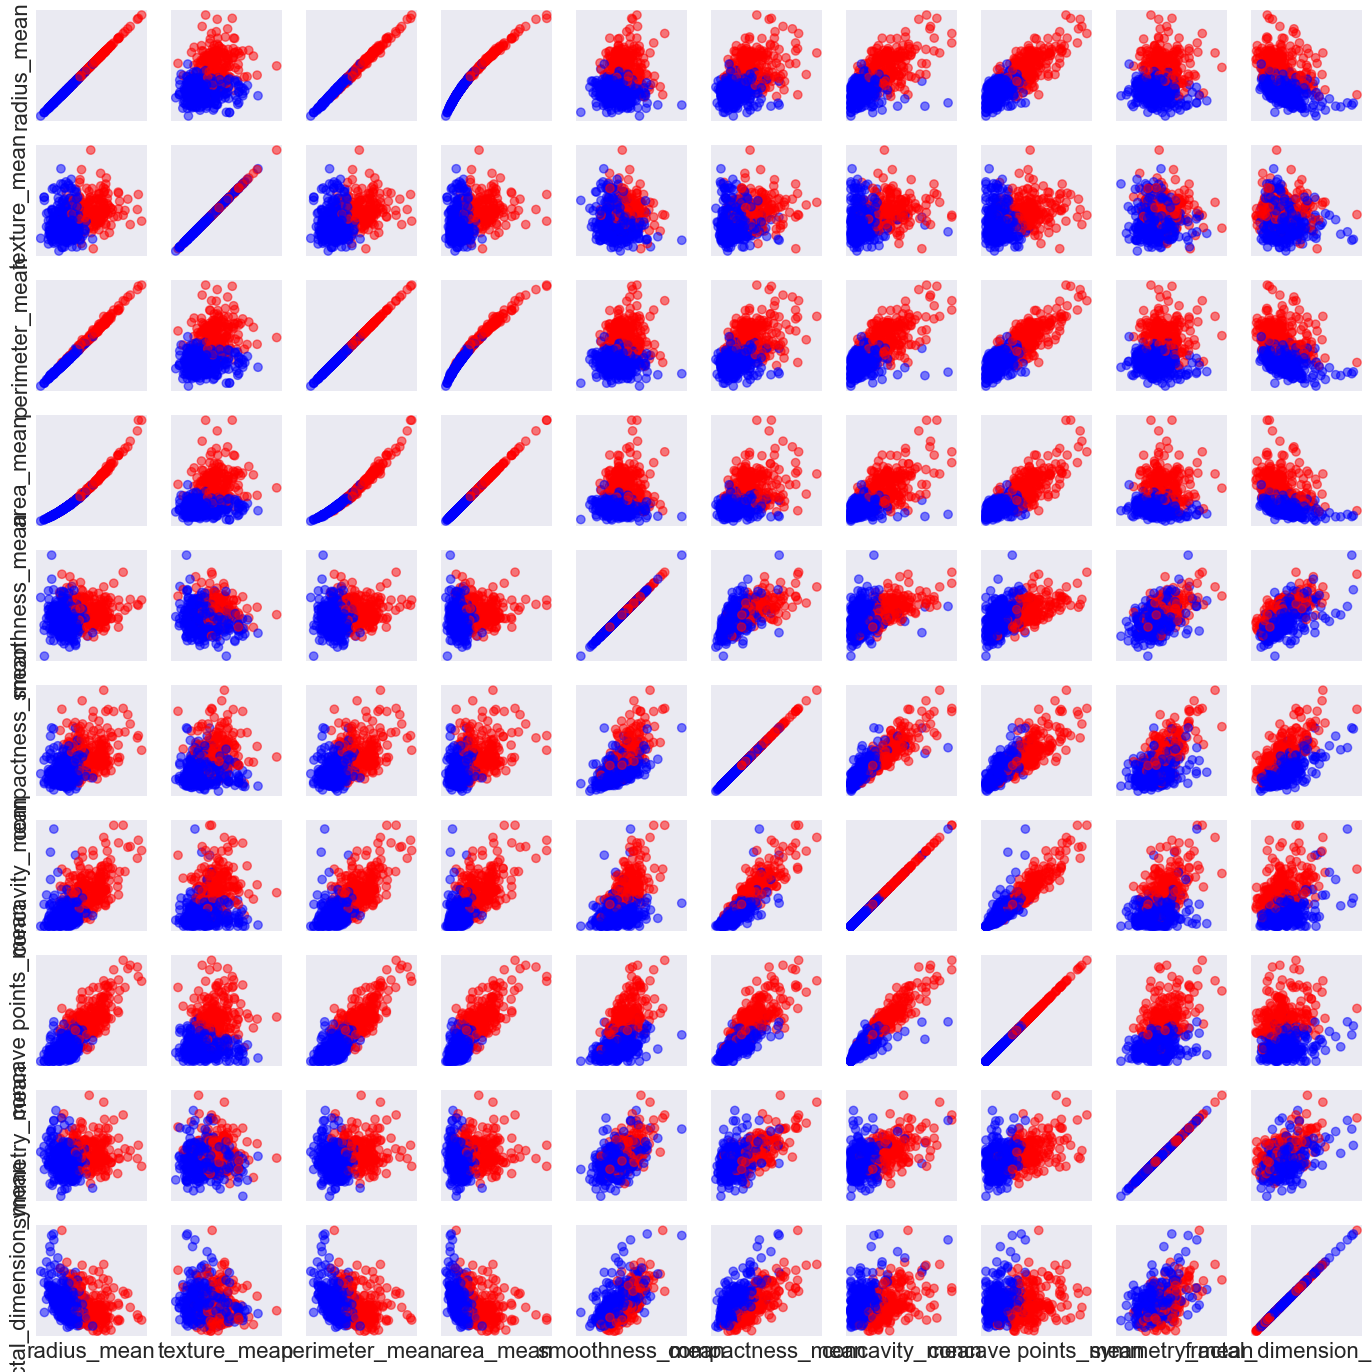

In [54]:
plt.figure(figsize=(14, 14))
cx = cancer_x.to_numpy()

for row_idx in range(cx.shape[1]):
    for col_idx in range(cx.shape[1]):
        plt.subplot(cx.shape[1], cx.shape[1], row_idx * cx.shape[1] + col_idx + 1)
        plt.scatter(cx[:, col_idx], cx[:, row_idx], color=cancer_y, alpha=0.5)
        
        plt.xticks([])
        plt.yticks([])
        
        if row_idx == cx.shape[1] - 1:
            plt.xlabel(x_names[col_idx])
        
        if col_idx == 0:
            plt.ylabel(x_names[row_idx])

plt.tight_layout()
plt.show()

### 2c. Create and visualize a covariance matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the covariance matrix of the `cancer_x` columns, store it in a variable, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. Set the xticks, yticks, xticklabels and ytickslabels. When setting the xtick labels, rotate them so they are readable and horizontally align them to the right (i.e. `ha='right'`). You can also use `setp` to handle rotating the x-axis tick labels.
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the `cmap` parameter for `imshow`
    4. Include a `colorbar`. This can be achieved by assigning a variable to your `imshow` call and then passing in that variable as a parameter to `plt.colorbar`. If that does not work, the [this example code](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) may be helpful.

*Your heatmap should show a 10x10 grid of colored squares.*

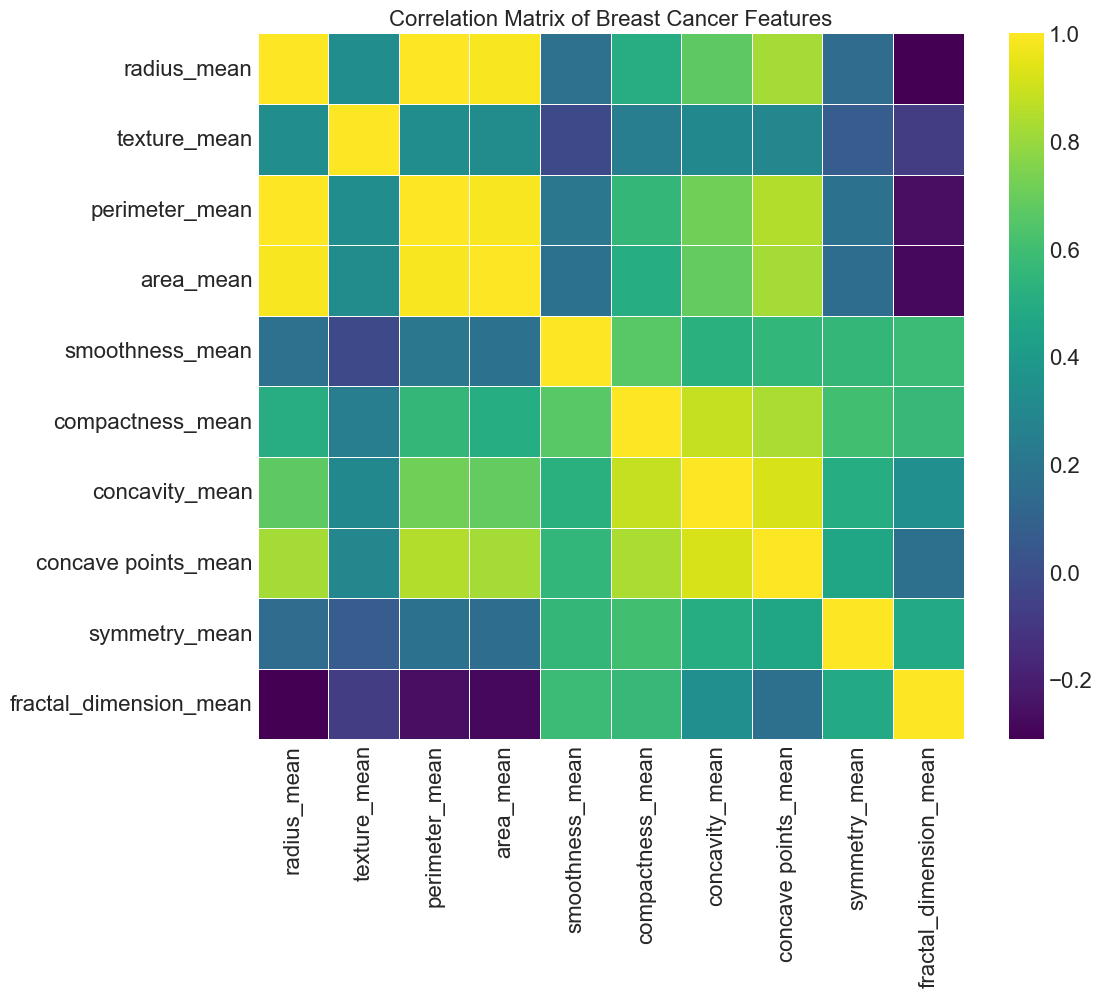

In [63]:
# Your code here

import seaborn as sns
import numpy as np

cov_matrix = cancer_x.cov()

log_cov_matrix = np.log1p(np.abs(cov_matrix))  

plt.figure(figsize=(12, 10))

corr_matrix = cancer_x.corr()

sns.heatmap(corr_matrix,
            annot=False,
            cmap='viridis',
            xticklabels=x_names,
            yticklabels=x_names,
            cbar=True,
            square=True,
            linewidths=0.5)

plt.title('Correlation Matrix of Breast Cancer Features', fontsize=16)
plt.tight_layout()
plt.show()

### 2d. Questions

**Question 3:** What interpretations can you draw from this covariance matrix?

**Answer 3:**

The covariance matrix visualized as a heatmap reveals important insights into the relationships between the different features of the breast cancer dataset. The predominance of blue and green boxes indicates that most feature pairs exhibit low to moderate positive covariance. This suggests that as the values of one feature increase, the values of the other feature also tend to increase, but not in a strongly correlated manner. However, the absence of red boxes signifies that there are no pairs of features with strong positive or negative covariance, indicating a lack of tight linear relationships among the features. Instead, the moderate covariances may suggest potential interactions between certain features that could be relevant for further analysis. 

### 2c. Performing PCA

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to apply PCA to the cancer dataset.
1. Create an instance of the PCA class with `len(x_names)` components. *This means that we will compute all 10 eigenvectors in our 10-D data set*.
2. Call the method `fit_` with `cancer_x` as the X parameter.
3. Store the transpose of the `components_` field of the PCA object in an variable named e_vecs. Print the shape to verify it is `(10,10)`. Note that each column of `e_vecs` is a principal component.
4. Store the `explained_variance_` field of the PCA object in a variable named `e_vals`. The first entry in `e_vals` is the eigen-value associated with the first column of `e_vecs`, etc. Print the values. There should be 10.

In [66]:
# Your code here
url = "https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
cancer_data = pd.read_csv(url)

x_names = ['radius_mean', 'texture_mean', 'perimeter_mean',
            'area_mean', 'smoothness_mean', 'compactness_mean', 
            'concavity_mean', 'concave points_mean', 
            'symmetry_mean', 'fractal_dimension_mean']
cancer_x = cancer_data[x_names]

pca = PCA(n_components=len(x_names))

pca.fit(cancer_x)

e_vecs = pca.components_.T  
print("Shape of eigenvectors (e_vecs):", e_vecs.shape)  

e_vals = pca.explained_variance_
print("Explained variances (e_vals):", e_vals)  


Shape of eigenvectors (e_vecs): (10, 10)
Explained variances (e_vals): [124432.26405     17.66436     14.94185      0.05202      0.00109
      0.0005       0.00022      0.00011      0.00005      0.00001]


### 2d. Visualize the PCA loadings

As above, plot the loadings for all of the principal components.

1. Print out the shape of the loadings (`e_vecs`). 
2. Use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to make a heatmap of the loadings. You should plot the **transposed** loadings, which will make your plot more readable — i.e. your heatmap should be taller than it is wide.
   1. Make the figure large enough that all the tick labels will fit (e.g. width of 12). Also, include a title.
   2. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`. The y tick labels (rows) should show the original 10 variable names. The x tick labels should be labeled with `'PC1'`, `'PC2'`, ..., `'PC10'`.
   3. Use an perceptually uniform **diverging** [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). Set it using the `cmap` parameter for `imshow`.
   4. To ensure that 0 is indicated by the neutral/middle color in the colormap, we need the data to be color-mapped using a range that is centered on zero. Compute the magnitude of the loadings (the maximim absolute loading). If you store that magnitude in a variable, named `mag`, then you can add the parameter and value to the imshow call: `norm=matplotlib.colors.Normalize(-mag,mag)`.
   5. Include a `colorbar`. This can be achieved by assigning a variable to your `imshow` call and then passing in that variable as a parameter to `plt.colorbar`. If that does not work, the [this example code](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) may be helpful.

Shape of loadings (e_vecs): (10, 10)


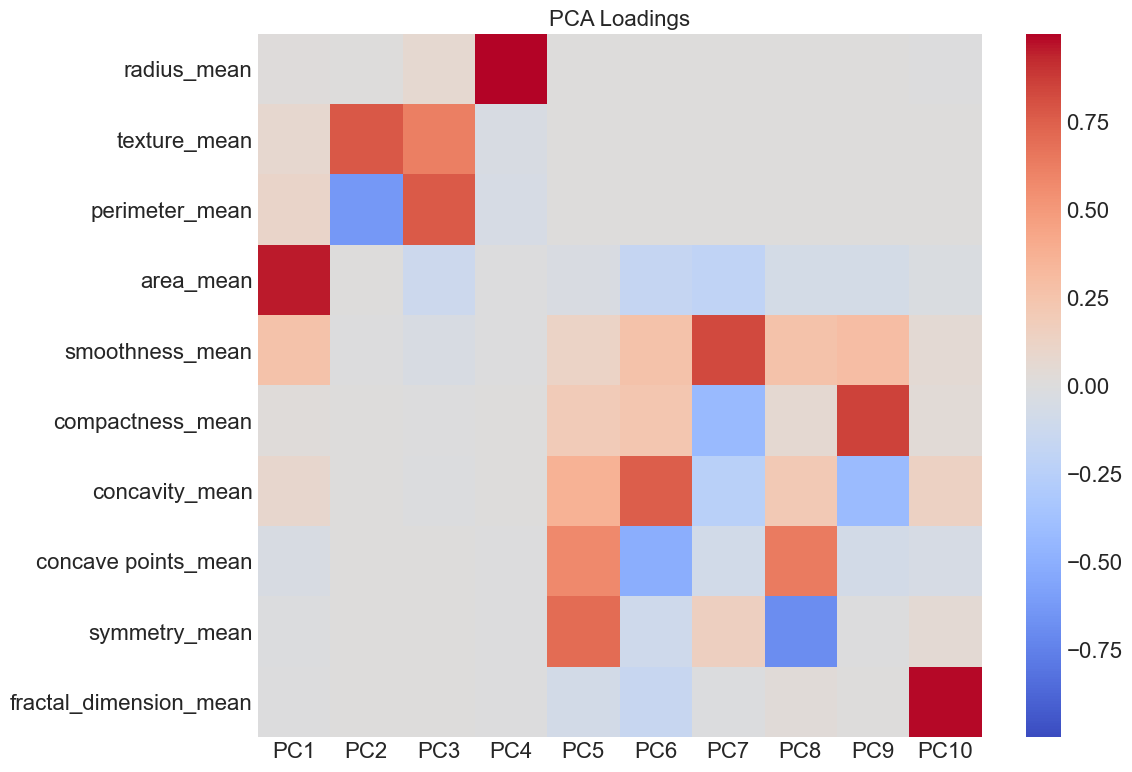

In [65]:
print("Shape of loadings (e_vecs):", e_vecs.shape)

plt.figure(figsize=(12, 8))
heatmap = plt.imshow(e_vecs.T, cmap='coolwarm', aspect='auto')

plt.title('PCA Loadings', fontsize=16)

plt.xticks(ticks=np.arange(len(e_vecs)), labels=[f'PC{i+1}' for i in range(len(e_vecs))])
plt.yticks(ticks=np.arange(len(x_names)), labels=x_names)

mag = np.max(np.abs(e_vecs))
norm = mcolors.Normalize(-mag, mag)

heatmap = plt.imshow(e_vecs.T, cmap='coolwarm', aspect='auto', norm=norm)

plt.colorbar(heatmap)

plt.tight_layout()
plt.show()


### 2e. Questions

**Question 4:** Interpret the loadings of PC1 and PC2. Which variables in the cancer dataset are most positively and negatively correlated with each PC?

**Answer 4:**

The loadings of PC1 in the cancer dataset indicate that variables like area_mean and perimeter_mean significantly contribute to the variance captured by this component, suggesting a strong association with larger tumor sizes. In contrast, smoothness_mean and symmetry_mean show weak or negative correlations, indicating they contribute less to this dimension, making PC1 primarily a size-related factor. Conversely, PC2 emphasizes different aspects of the data, with compactness_mean and concavity_mean displaying significant positive loadings, suggesting tumors that are more compact and concave align with higher values of PC2. In contrast, texture_mean and radius_mean exhibit negative correlations with PC2, indicating that as these features increase, PC2 decreases. Thus, while PC1 focuses on tumor size, PC2 captures features related to the shape and texture of tumors.

## Turn in your lab

Follow the usual submission format and submit your lab on Google Classroom.